In [1]:
%matplotlib notebook

%config Completer.use_jedi = False

In [2]:
from pathlib import Path

import sys
#sys.path.insert(0,"/Users/danakoeppe/PipelineProjects/SAMOS_DRP/SAMOS_Draft/")

import os
#current working directory
cwd = os.getcwd() 
print(cwd)

#parent directort
parent_directory = os.path.dirname(cwd)
print(parent_directory)
sys.path.insert(0,parent_directory)

/Users/robberto/Desktop/SAMOS_pipeline/SAMOS_DataReductionPipeline-dev/NotebookTests
/Users/robberto/Desktop/SAMOS_pipeline/SAMOS_DataReductionPipeline-dev


In [3]:
from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

from matplotlib.colors import LogNorm
from PIPELINE.convenience_functions import show_image

from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import importlib



from astropy.stats import mad_std

from itertools import groupby

from PIL import Image as P
from astropy.visualization import quantity_support
quantity_support();  # auto-recognizes units on matplotlib plots

#from ipywidgets import interact
import ipywidgets as widgets

#import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display,Image
import plotly.express as px
from skimage import io



In [4]:
def jpeg_pixel_map(data,s1=-10,s2=10):
    d = data.astype('f')
    m = np.median(d)
    s = 1.49*np.median(np.abs(d-m))
    z1 = m-s1*s
    z2 = m+s1*s
    pixels = np.clip(255*(d-z1)/(z2-z1),0,255).astype("b")
    pixmap = P.frombytes("L",(pixels.shape[1],pixels.shape[0]),pixels.ravel().tostring())
    image = P.merge("L",[pixmap])
    
    return image

In [5]:

def check_images(snight):
    # Create widgets
    directory = widgets.Dropdown(options=[snight.raw_data_dir,snight.processing_dir])
    images = widgets.Dropdown(options=os.listdir(directory.value))

    # Updates the image options based on directory value
    def update_images(*args):
        images.options = os.listdir(directory.value)

    # Tie the image options to directory value
    directory.observe(update_images, 'value')

    def show_images(fdir,file):

        fname = f'{fdir}/{file}'


        full_im_ccd = CCDData.read(fname,unit='adu')

        #full_im_pixel_map = jpeg_pixel_map(full_im_ccd.data,s1=10,s2=full_im_data.flatten().max())


        fig = px.imshow(full_im_ccd.data,color_continuous_scale='gray')

        display(fig)

    _ = interact(show_images,fdir=directory,file=images)

ModuleNotFoundError: No module named 'plotly'

In [6]:
raw_goodman_path = "/Users/danakoeppe/PipelineProjects/GOODMAN_raw_data/"


SAMOS_raw_path = Path(raw_goodman_path)
                    #Path(\'./fake_raw_SAMOS_data/')

SAMOS_raw = ccdp.ImageFileCollection(SAMOS_raw_path)

SAMOS_raw.summary['file','obstype','exptime','rdnoise','gain','slit']

file,obstype,exptime,rdnoise,gain,slit
str26,str6,float64,float64,float64,str19
psg_140319_210352_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_210620_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_210744_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_210907_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_211031_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_211154_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_211318_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_211442_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R
psg_140319_211605_fri.fits,FLAT,2.0,3.99,2.06,Ori0B1-field2-0000R


In [7]:


log_filename = "SAMOS_DRP_testing.log"

log_format = '[%(asctime)s][%(levelname)8s]: %(message)s ' \
                     '[%(module)s.%(funcName)s:%(lineno)d]'
date_format = '%H:%M:%S'


import logging
import logging.config
importlib.reload(logging)
importlib.reload(logging.config)


logging.basicConfig(level=logging.DEBUG,
                   filename=log_filename)

formatter = logging.Formatter(fmt=log_format,
                              datefmt=date_format)

file_handler = logging.FileHandler(filename=log_filename)
file_handler.setFormatter(fmt=formatter)
file_handler.setLevel(level=logging.DEBUG)


log = logging.getLogger(__name__)

log.addHandler(file_handler)
log.addHandler(logging.StreamHandler())



In [8]:
import shutil

#shutil.rmtree("./processed/")

In [9]:
from PIPELINE import SAMOS_NIGHT as SN
importlib.reload(SN)

#log_filename = "SAMOS_DRP_testing.log"

SNight = SN.SAMOSNight(raw_data_dir=raw_goodman_path,
                   obsid="fake_samos_test",
                   proc_dir="processed",
                   LOG_FILENAME=log_filename,
                   ignore_bias=False,
                   ignore_flats=False)

SNight()

True
{'obsid': 'fake_samos_test', 'data_path': '/Users/danakoeppe/PipelineProjects/GOODMAN_raw_data/', 'gain': 2.06, 'rdnoise': 3.99, 'ccdsum': '1 1', 'empty_bucket': True, 'bias_buckets': None, 'flat_buckets': None, 'comp_buckets': None, 'targ_buckets': None, 'spec_buckets': None, 'slit_buckets': None, 'fits_slit_locs': None, 'sunset_time': None, 'sunrise_time': None, 'evening_twilight': None, 'morning_twilight': None, 'header_keys': ['naxis', 'date', 'slit', 'date-obs', 'obstype', 'object', 'exptime', 'obsra', 'obsdec', 'grating', 'cam_targ', 'grt_targ', 'filter', 'filter2', 'gain', 'rdnoise', 'ccdsum', 'wavmode']}


[<class 'PIPELINE.DataBucket.DataBucket'>
 SAMOS Observation ID: fake_samos_test
 Data Directory: 
 Working Directory: NotebookTests
 Gain: 2.06
 Readout Noise: 3.99
 ccdsum: 1 1
 Is Empty: False
 
 Bucket Grouping Information
 
 (small buckets inside bigger bucekts!)
 BIAS Group:
 Files in BUCKET
   psg_140319_214444_zri.fits
   psg_140319_214606_zri.fits
   psg_140319_214727_zri.fits
   psg_140319_214849_zri.fits
   psg_140319_215010_zri.fits
   psg_140319_215132_zri.fits
   psg_140319_215253_zri.fits
   psg_140319_215415_zri.fits
   psg_140319_215536_zri.fits
   psg_140319_215658_zri.fits
   psg_140319_215819_zri.fits
   psg_140319_215940_zri.fits
   psg_140319_220102_zri.fits
   psg_140319_220223_zri.fits
   psg_140319_220345_zri.fits
   psg_140319_220506_zri.fits
   psg_140319_220628_zri.fits
   psg_140319_220749_zri.fits
   psg_140319_220911_zri.fits
   psg_140319_221032_zri.fits
 FLATs Group:
 Files in BUCKET
   psg_140319_210352_fri.fits
   psg_140319_210620_fri.fits
   psg_140

# CCD Processing Routine

Goes through each **bias**, **flat**, and **obj-comp pair** and does the initial CCD reduction.
First, it will create a list of file names from that group and choose a random image to use as a reference.  From this reference image, the pipeline obtains and saves the trim section (and overscan region, if $\texttt{ignore_bias==True}$).


## First group: Bias Frames

If $\texttt{ignore_bias==False}$, a master bias frame is created. 

## Second group: Flat Frames

If $\texttt{ignore_flats==False}$, a master flat is created.

In [10]:
SNight.data_buckets.bias_buckets[0]

,file,naxis,date,slit,date-obs,obstype,object,exptime,obsra,obsdec,...,cam_targ,grt_targ,filter,filter2,gain,rdnoise,ccdsum,wavmode,radeg,decdeg
10,psg_140319_214444_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:44:44.990,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
11,psg_140319_214606_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:46:06.470,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
12,psg_140319_214727_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:47:27.920,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
13,psg_140319_214849_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:48:49.340,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
14,psg_140319_215010_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:50:10.780,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
15,psg_140319_215132_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:51:32.200,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
16,psg_140319_215253_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:52:53.620,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
17,psg_140319_215415_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:54:15.060,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
18,psg_140319_215536_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:55:36.570,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg
19,psg_140319_215658_zri.fits,2,2014-03-19,Ori0B1-field2-0000R,2014-03-19T21:56:58.020,BIAS,ZERO,0.0,04:13:24.164,-30:13:35.702,...,16.1,7.5,<NO FILTER>,GG455,2.06,3.99,1 1,400_M2,63.35 deg,-30.23 deg


In [11]:
from PIPELINE.SAMOS_mods import def_samos_trim_section as samos_trim
samp_imgs = []
trim_secs = []
for bucket in [SNight.data_buckets.bias_buckets,
               SNight.data_buckets.flat_buckets,
               SNight.data_buckets.spec_buckets]:
    
    if bucket is not None:
        
        image_list = bucket[0]['file'].tolist()
        sample_image = os.path.join(SNight.raw_data_dir,
                                    np.random.choice(image_list))
        
        samp_imgs.append(sample_image)
        
        trim_section = samos_trim(sample_image)
        trim_secs.append(trim_section)
        
            
samp_imgs,trim_secs

(['/Users/danakoeppe/PipelineProjects/GOODMAN_raw_data/psg_140319_215819_zri.fits',
  '/Users/danakoeppe/PipelineProjects/GOODMAN_raw_data/psg_140319_210907_fri.fits',
  '/Users/danakoeppe/PipelineProjects/GOODMAN_raw_data/psg_140320_005443_cri.fits'],
 ['[30:4110,1:1896]', '[30:4110,1:1896]', '[30:4110,1:1896]'])

In [12]:
import PIPELINE.ImageProcessor as ImProc
import PIPELINE.SAMOS_mods as Smods
importlib.reload(Smods)
importlib.reload(ImProc)


SN_ccd = ImProc.ImageProcessor(SNight,num_expected_slits=7)
SN_ccd()



INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140319_235651_ori.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_001436_ori.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_003057_ori.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005007_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005319_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005443_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005607_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005731_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_005854_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010018_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010142_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010305_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010429_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
science_image shape: (1896, 4142), master_bias shape: (1896, 4142)
psg_140320_010553_cri.fits master_bias_1x1_R3d99_G2d06.fits
master bias shape: (1896, 4142)
 current ccd shape: (1896, 4142)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
985 1015
[[ 443  484]
 [ 759  835]
 [ 933 1008]
 [1051 1126]
 [1267 1340]
 [1368 1409]
 [1425 1466]] False 7
1005 1035
[[ 443  484]
 [ 759  835]
 [ 933 1008]
 [1051 1126]
 [1267 1340]
 [1368 1409]
 [1425 1466]] False 7
2025 2055
[[ 446  486]
 [ 762  837]
 [ 935 1010]
 [1053 1128]
 [1269 1341]
 [1370 1411]
 [1427 1468]] False 7
3045 3075
[[ 448  488]
 [ 764  839]
 [ 937 1012]
 [1055 1130]
 [1271 1344]
 [1373 1413]
 [1430 1470]] False 7
3861 3891
[[ 449  489]
 [ 766  841]
 [ 939 1015]
 [1057 1133]
 [1274 1347]
 [1376 1416]
 [1433 1473]] False 7
4036 4066
[[ 449  489]
 [ 766  841]
 [ 940 1015]
 [1058 1133]
 [1275 1348]
 [1377 1417]
 [1434 1474]] False 7
[array([[ 443,  484],
       [ 759,  835],
       [ 933, 1008],
       [1051, 1126],
       [1267, 1340],
       [1368, 1409],
       [1425, 1466]]), array([[ 443,  484],
       [ 759,  835],
       [ 933, 1008],
       [10

In [13]:
import PIPELINE.SlitBuckets2 as Slits
import PIPELINE.slit_tracing_mods as stm
import PIPELINE.SAMOSHelpers
importlib.reload(PIPELINE.SAMOSHelpers)
importlib.reload(Slits)
importlib.reload(stm)
importlib.reload(Smods)



SN_slits = Slits.SlitBuckets(SN_ccd)
SN_slits()


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [27]:
import PIPELINE.ReDoWavecal as DoWv
importlib.reload(DoWv)
import PIPELINE.Spectroscopy.wavelength
importlib.reload(PIPELINE.Spectroscopy.wavelength)
import PIPELINE.Spectroscopy.wcs
importlib.reload(PIPELINE.Spectroscopy.wcs)


SN_wv = DoWv.WaveCalBuckets(SN_slits)

SN_wv()

reference lamp location: /Users/danakoeppe/PipelineProjects/SAMOS_DRP/SAMOS_Draft/NotebookTests/../comp_refs
True
TESTING
ftz_combined_orionfield-2_400_01-2-0000_13.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


<class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60> <class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60>
ftz_combined_HgAr_400_01-2-0000_10.fits processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
ftz_combined_orionfield-2_400_01-2-0000_13.fits processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
True
TESTING
ftz_combined_orionfield-2_400_01-2-0000_13.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


<class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60> <class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60>
ftz_combined_HgAr_400_01-2-0000_10.fits processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
ftz_combined_orionfield-2_400_01-2-0000_13.fits processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
True
TESTING
ftz_combined_orionfield-2_400_01-2-0000_13.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


<class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60> <class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60>
ftz_combined_HgAr_400_01-2-0000_10.fits processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
ftz_combined_orionfield-2_400_01-2-0000_13.fits processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
True
TESTING
ftz_combined_orionfield-2_400_01-2-0000_13.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


<class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60> <class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60>
ftz_combined_HgAr_400_01-2-0000_10.fits processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
ftz_combined_orionfield-2_400_01-2-0000_13.fits processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
True
TESTING
ftz_combined_orionfield-2_400_01-2-0000_13.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


<class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60> <class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60>
ftz_combined_HgAr_400_01-2-0000_10.fits processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
ftz_combined_orionfield-2_400_01-2-0000_13.fits processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
True
TESTING
ftz_combined_orionfield-2_400_01-2-0000_13.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


<class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60> <class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60>
ftz_combined_HgAr_400_01-2-0000_10.fits processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
ftz_combined_orionfield-2_400_01-2-0000_13.fits processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
True
TESTING
ftz_combined_orionfield-2_400_01-2-0000_13.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


<class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60> <class 'astropy.modeling.polynomial.Chebyshev1D'>
Name: Chebyshev1D
N_inputs: 1
N_outputs: 1
Fittable parameters: <property object at 0x7fd18a283d60>
ftz_combined_HgAr_400_01-2-0000_10.fits processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits
ftz_combined_orionfield-2_400_01-2-0000_13.fits processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits
processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits


In [46]:

import PIPELINE.SAMOSHelpers
importlib.reload(module=PIPELINE.SAMOSHelpers)
from PIPELINE.SAMOSHelpers import save_bucket_status
import pickle

save_bucket_status(SN_wv,bucket_fname="wavecal_july19")

of = open("dump_test.txt", "w")
pickle.dump(SN_wv,of)

of.close()

TypeError: write() argument must be str, not bytes

In [32]:
import PIPELINE.SAMOS_mods
importlib.reload(PIPELINE.SAMOS_mods)
from PIPELINE.SAMOS_mods import create_slit_cutout_polygon, trace_slit_edges_from_cross_disp_coadd

import matplotlib

from astropy.visualization import simple_norm

from PIPELINE.convenience_functions import show_image


from specutils import Spectrum1D

import astropy.wcs as fitswcs
import astropy.units as u


gsp_rwccd = CCDData.read("./goodman_test_products/wftz_combined_Cu_930_1.5_01_ws_1.fits")

ssp_rwccd = CCDData.read("./processed/wftz_combined_HgAr_400_01-2-0000_10_ws_1.fits")





gsp_wcs = fitswcs.WCS(header={'CDELT1': 0.8324226228310181, 
                              'CRVAL1': 3790.917695305725, 
                              'CUNIT1': 'Angstrom', 
                              'CTYPE1': 'LINEAR', 
                              'RESTFRQ': 1400000000, 
                              'CRPIX1': 1})


ssp_wcs = fitswcs.WCS(header={'CDELT1': 0.9998439055652852 , 
                              'CRVAL1': 5184.910630431113 , 
                              'CUNIT1': 'Angstrom', 
                              'CTYPE1': 'LINEAR', 
                              'RESTFRQ': 1400000000, 
                              'CRPIX1': 1})


gsp_spec1d = Spectrum1D(gsp_rwccd.data*u.angstrom,wcs=gsp_wcs)


ssp_spec1d = Spectrum1D(ssp_rwccd.data*u.angstrom,wcs=ssp_wcs)

gsp_wvs = np.array(gsp_spec1d.wavelength/u.angstrom)

ssp_wvs = np.array(ssp_spec1d.wavelength/u.angstrom)

ssp_wvs

array([5184.91063043, 5185.91047434, 5186.91031824, ..., 9262.27407733,
       9263.27392123, 9264.27376514])

<IPython.core.display.Javascript object>


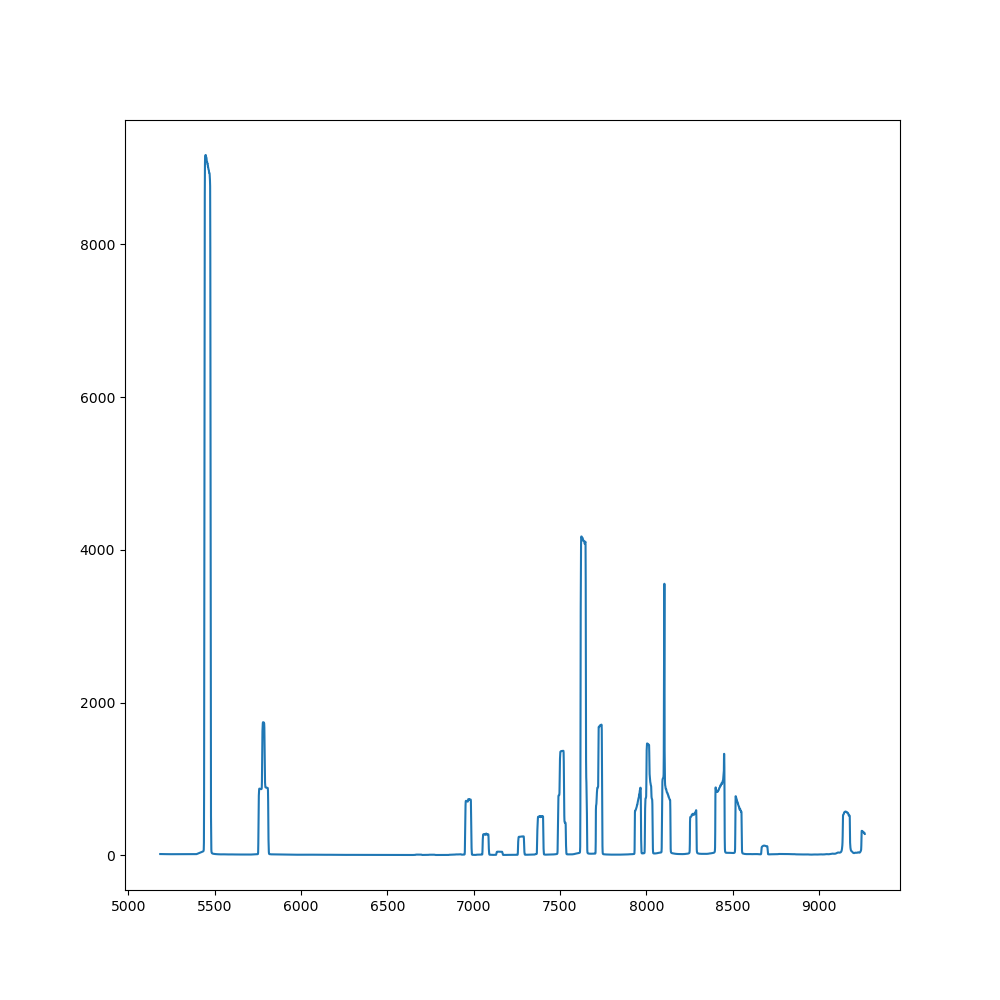

In [34]:
%matplotlib notebook


from ipywidgets import interact
import ipywidgets as widgets

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()



ax.plot(ssp_wvs,ssp_rwccd.data)

<IPython.core.display.Javascript object>


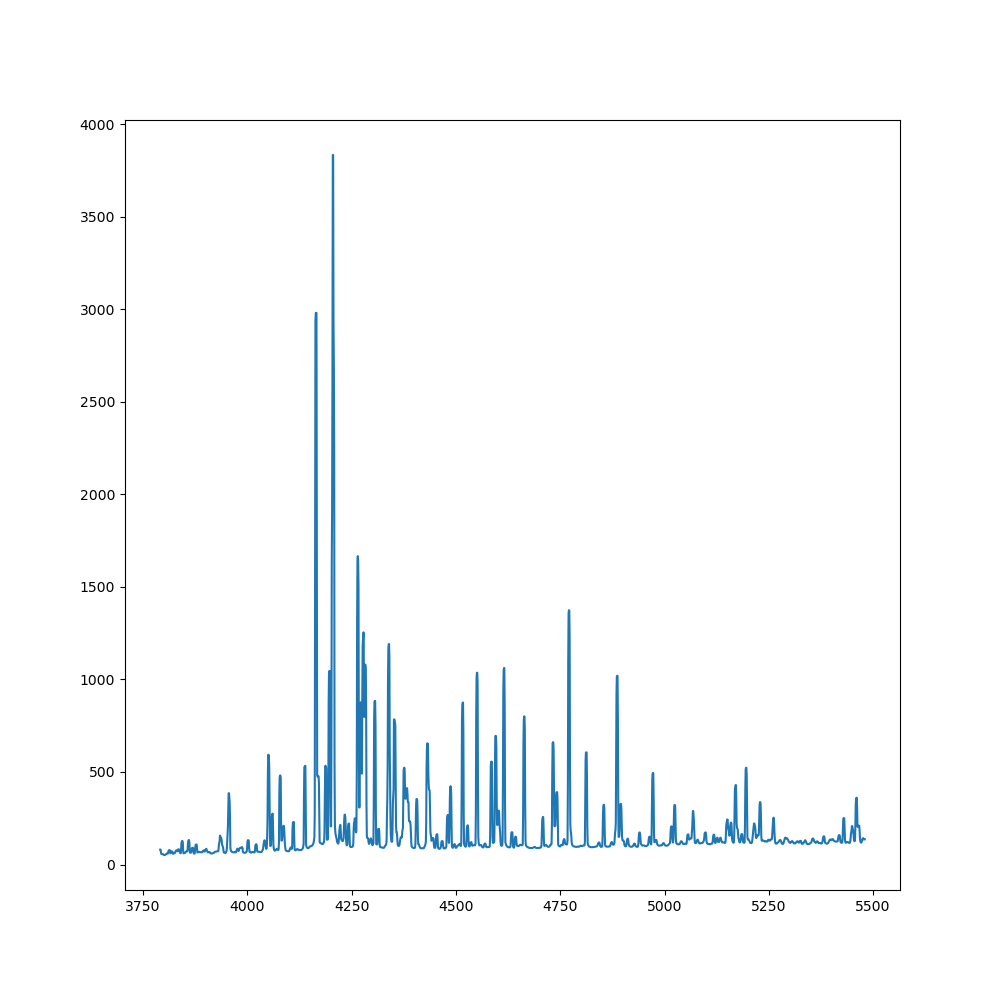

In [36]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()




ax.plot(gsp_wvs,gsp_rwccd.data)


CCDData([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
SN_slits.num_slits

FileNotFoundError: [Errno 2] No such file or directory: 'processed/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits'

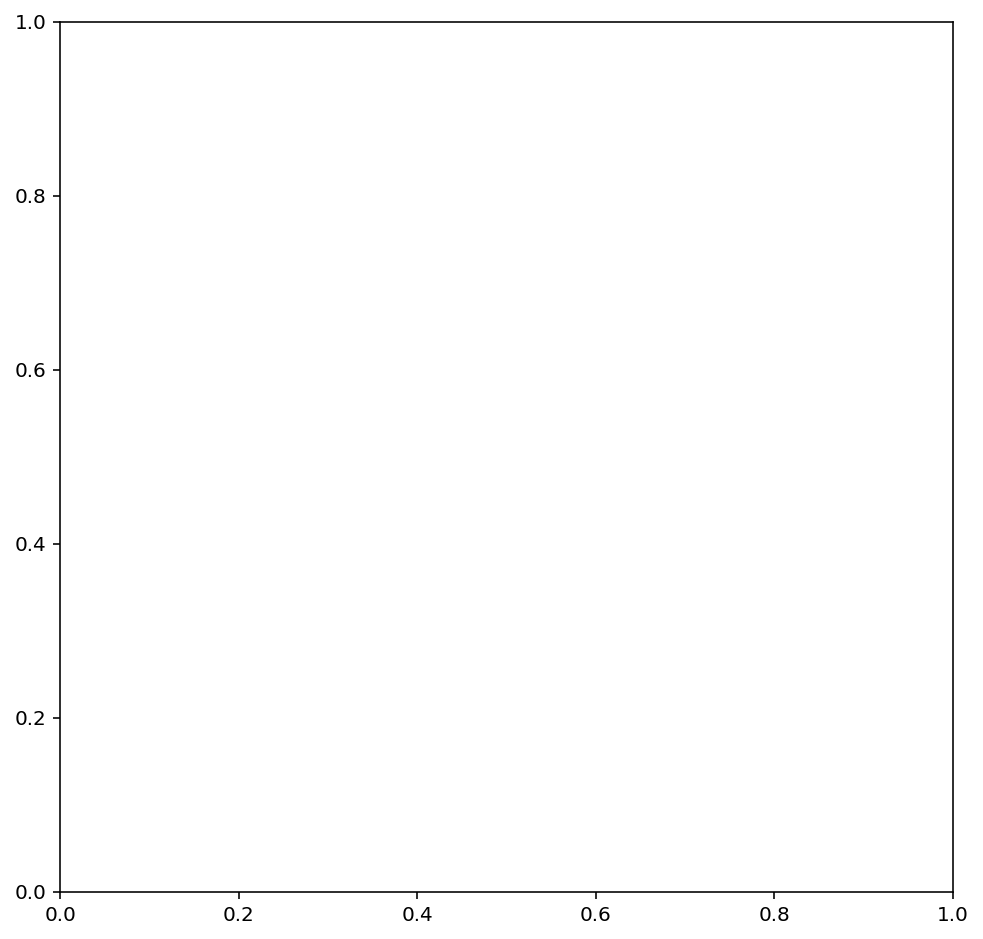

In [42]:
fig1 = plt.figure(figsize=(8,8))
gs1 = gridspec.GridSpec(figure=fig1,ncols=1,nrows=1)
ax1 = fig1.add_subplot(gs1[0])

ccd1d = CCDData.read(SN_wv.processing_dir + "/wftz_combined_orionfield-2_400_01-2-0000_13_ws_1.fits",unit='adu')



In [104]:
SN_wv.wavecal_spec_buckets[0].